In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches
import simlib
from importlib import reload


np.float64(2818.9971924722017)

In [31]:
mars.get_circular_orbit_velocity(3000e3) - mars.get_circular_orbit_velocity(2000e3)

np.float64(-229.97696060568296)

In [33]:
(rocket.mass * 230 / 200)/2

172.5

==== TOO MUCH STEPS ====


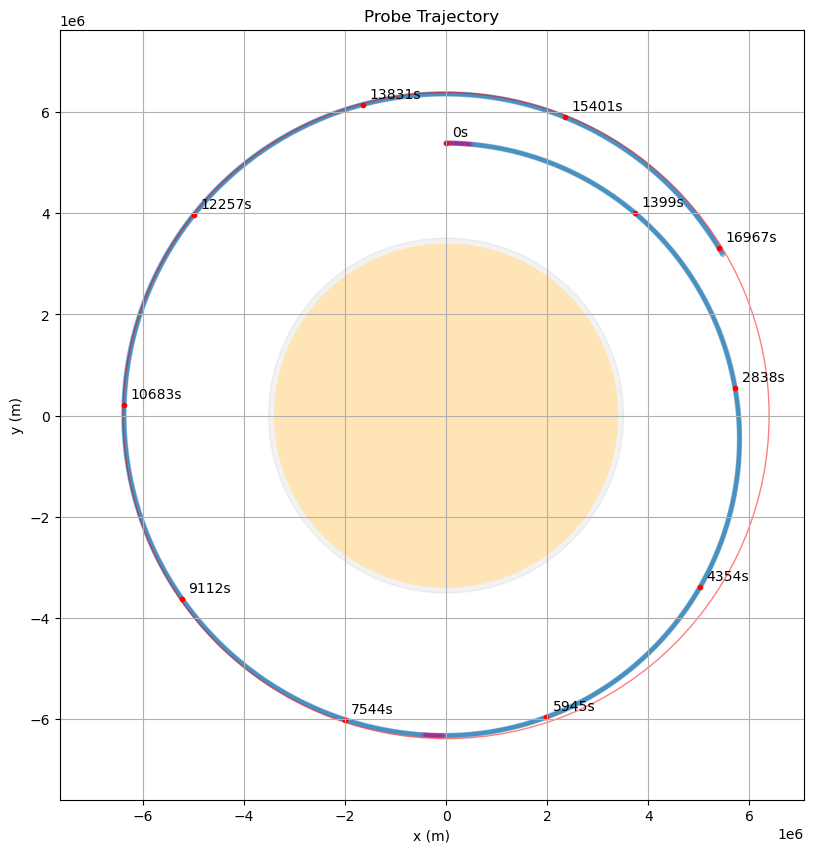

In [68]:
reload(simlib)

MAX_STEPS = 1500
mars = simlib.Mars

#h0 = 3000e3
#p0 = (0, h0 + mars.radius) # (x0 (m), y0 (degrees))
#v0 = (mars.get_circular_orbit_velocity(h0), 0) # 
#probe0 = simlib.SpaceCraft(300, p0, v0, (0,0), 0, gridsize_min=10000)

h1 = 2000e3
p1 = (0, h1 + mars.radius) # (x0 (m), y0 (degrees))
v1 = (mars.get_circular_orbit_velocity(h1), 0) # 
probe1 = simlib.SpaceCraft(300, p1, v1, (0,0), 0, gridsize_min=30000)

step_nb = 0
while True:
    step_nb += 1
    
    #_, g0, h0 = mars.get_Rgh(probe0.p, probe0.v)
    #probe0.a = - g0


    P1, R1, g1, h1 = mars.get_PRgh(probe1.p, probe1.v)

    if probe1.t > 0:
        probe1.start_microthruster(200)

    if probe1.t > 172.5:
        probe1.stop_microthruster()

    if probe1.t > 6760:
        probe1.start_microthruster(200)

    if probe1.t > 6760+172.5:
        probe1.stop_microthruster()
    

    #if theta1 > 90:
    #    probe1

    #probe0.update(g0)
    probe1.update(P1, R1, g1)
    
    if step_nb > MAX_STEPS:
        print('==== TOO MUCH STEPS ====')
        break

    if h1 < 0:
        print('==== PROBE1 CRASHED ====')
        break

    #if h1 > h0 + 1000e3:
    #    print('==== PROBE1 GOT TOO FAR ====')
    #    break
        

#probe0.plot_trajectory(mars)
probe1.plot_trajectory(mars, altitude_target=3000e3, alpha=0.3)#, overplot=True)

#probe.plot_parachute_tension()
#probe.plot_velocity()
#probe.plot_acceleration()




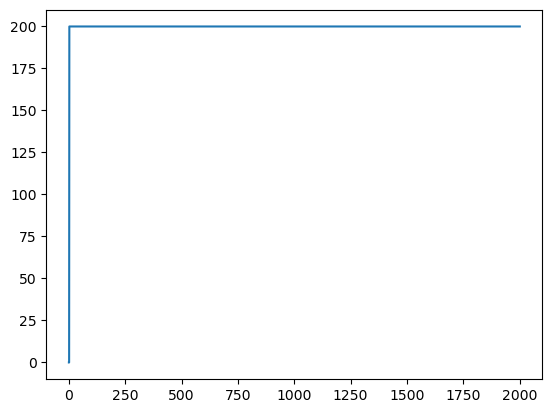

In [22]:
plt.plot(rocket.all_thrust)